In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [4]:
mpl.rc('font',family='TeX Gyre Bonum')
plt.rcParams['mathtext.fontset'] = 'cm'
# plt.rcParams['text.usetex'] = True

In [12]:
plt.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'b

In [5]:
data = pd.read_excel("data.xlsx",header=6,usecols="B,E,F",nrows=29).dropna()

In [6]:
data

,Thickness (mm),Count rate,Corrected Rate
0,0.000000,8.855556,8.574444
2,1.110000,1.208333,0.927222
4,2.226667,1.150000,0.868889
6,3.333333,1.037500,0.756389
8,4.366667,1.145833,0.864722
10,5.416667,0.916667,0.635556
12,5.326667,0.841667,0.560556
14,6.436667,0.850000,0.568889
16,7.553333,0.791667,0.510556
18,8.660000,0.829167,0.548056


In [96]:
counts = pd.read_excel("data.xlsx",header=6,usecols="c",nrows=30).dropna()
counts

,Count
0,396
1,401
2,139
3,151
4,137
5,139
6,119
7,130
8,138
9,137


In [119]:
t = np.array(counts['Count'])
ct = t.astype(float)
ct[0] = ct[0]/45
ct[1] = ct[1]/45
ct[2:]=ct[2:]/120
ct = ct-0.281
ctstd = np.array(np.zeros(int(len(t)/2)))
for i in range(0 , len(t),2):
    ctstd[int(i/2)] = np.std([ct[i],ct[i+1]])
ctstd

array([0.05555556, 0.05      , 0.00833333, 0.04583333, 0.00416667,
       0.06666667, 0.075     , 0.125     , 0.01666667, 0.1125    ,
       0.025     , 0.00416667, 0.03333333, 0.00416667, 0.02916667])

In [7]:
thick = np.array(data["Thickness (mm)"][1:])
count_rate = np.array(data["Count rate"][1:])
corrected_rate = np.array(data["Corrected Rate"][1:])

In [122]:
lnctstd = ctstd[1:]/corrected_rate
lnctstd

array([0.05392451, 0.00959079, 0.06059493, 0.0048185 , 0.1048951 ,
       0.13379584, 0.21972656, 0.03264418, 0.20527116, 0.0596817 ,
       0.01289768, 0.08462623, 0.00947568, 0.09519492])

In [8]:
def f(x,a,b):
    return a*x+b    

In [130]:
param,paramcov = curve_fit(f, thick, np.log(count_rate))
print(param)
x = np.linspace(thick[0],thick[-1],1000)
y = f(x, *param)

perr = np.sqrt(np.diag(paramcov))
perr

[-0.06162765  0.26305147]


array([0.00573457, 0.04548936])

In [132]:
param1,paramcov1 = curve_fit(f, thick, np.log(corrected_rate))
print(param1)
x1 = np.linspace(thick[0],thick[-1],1000)
y1 = f(x, *param1)
perr1 = np.sqrt(np.diag(paramcov1))
perr1

[-0.0935731   0.06219076]


array([0.00890454, 0.07063503])

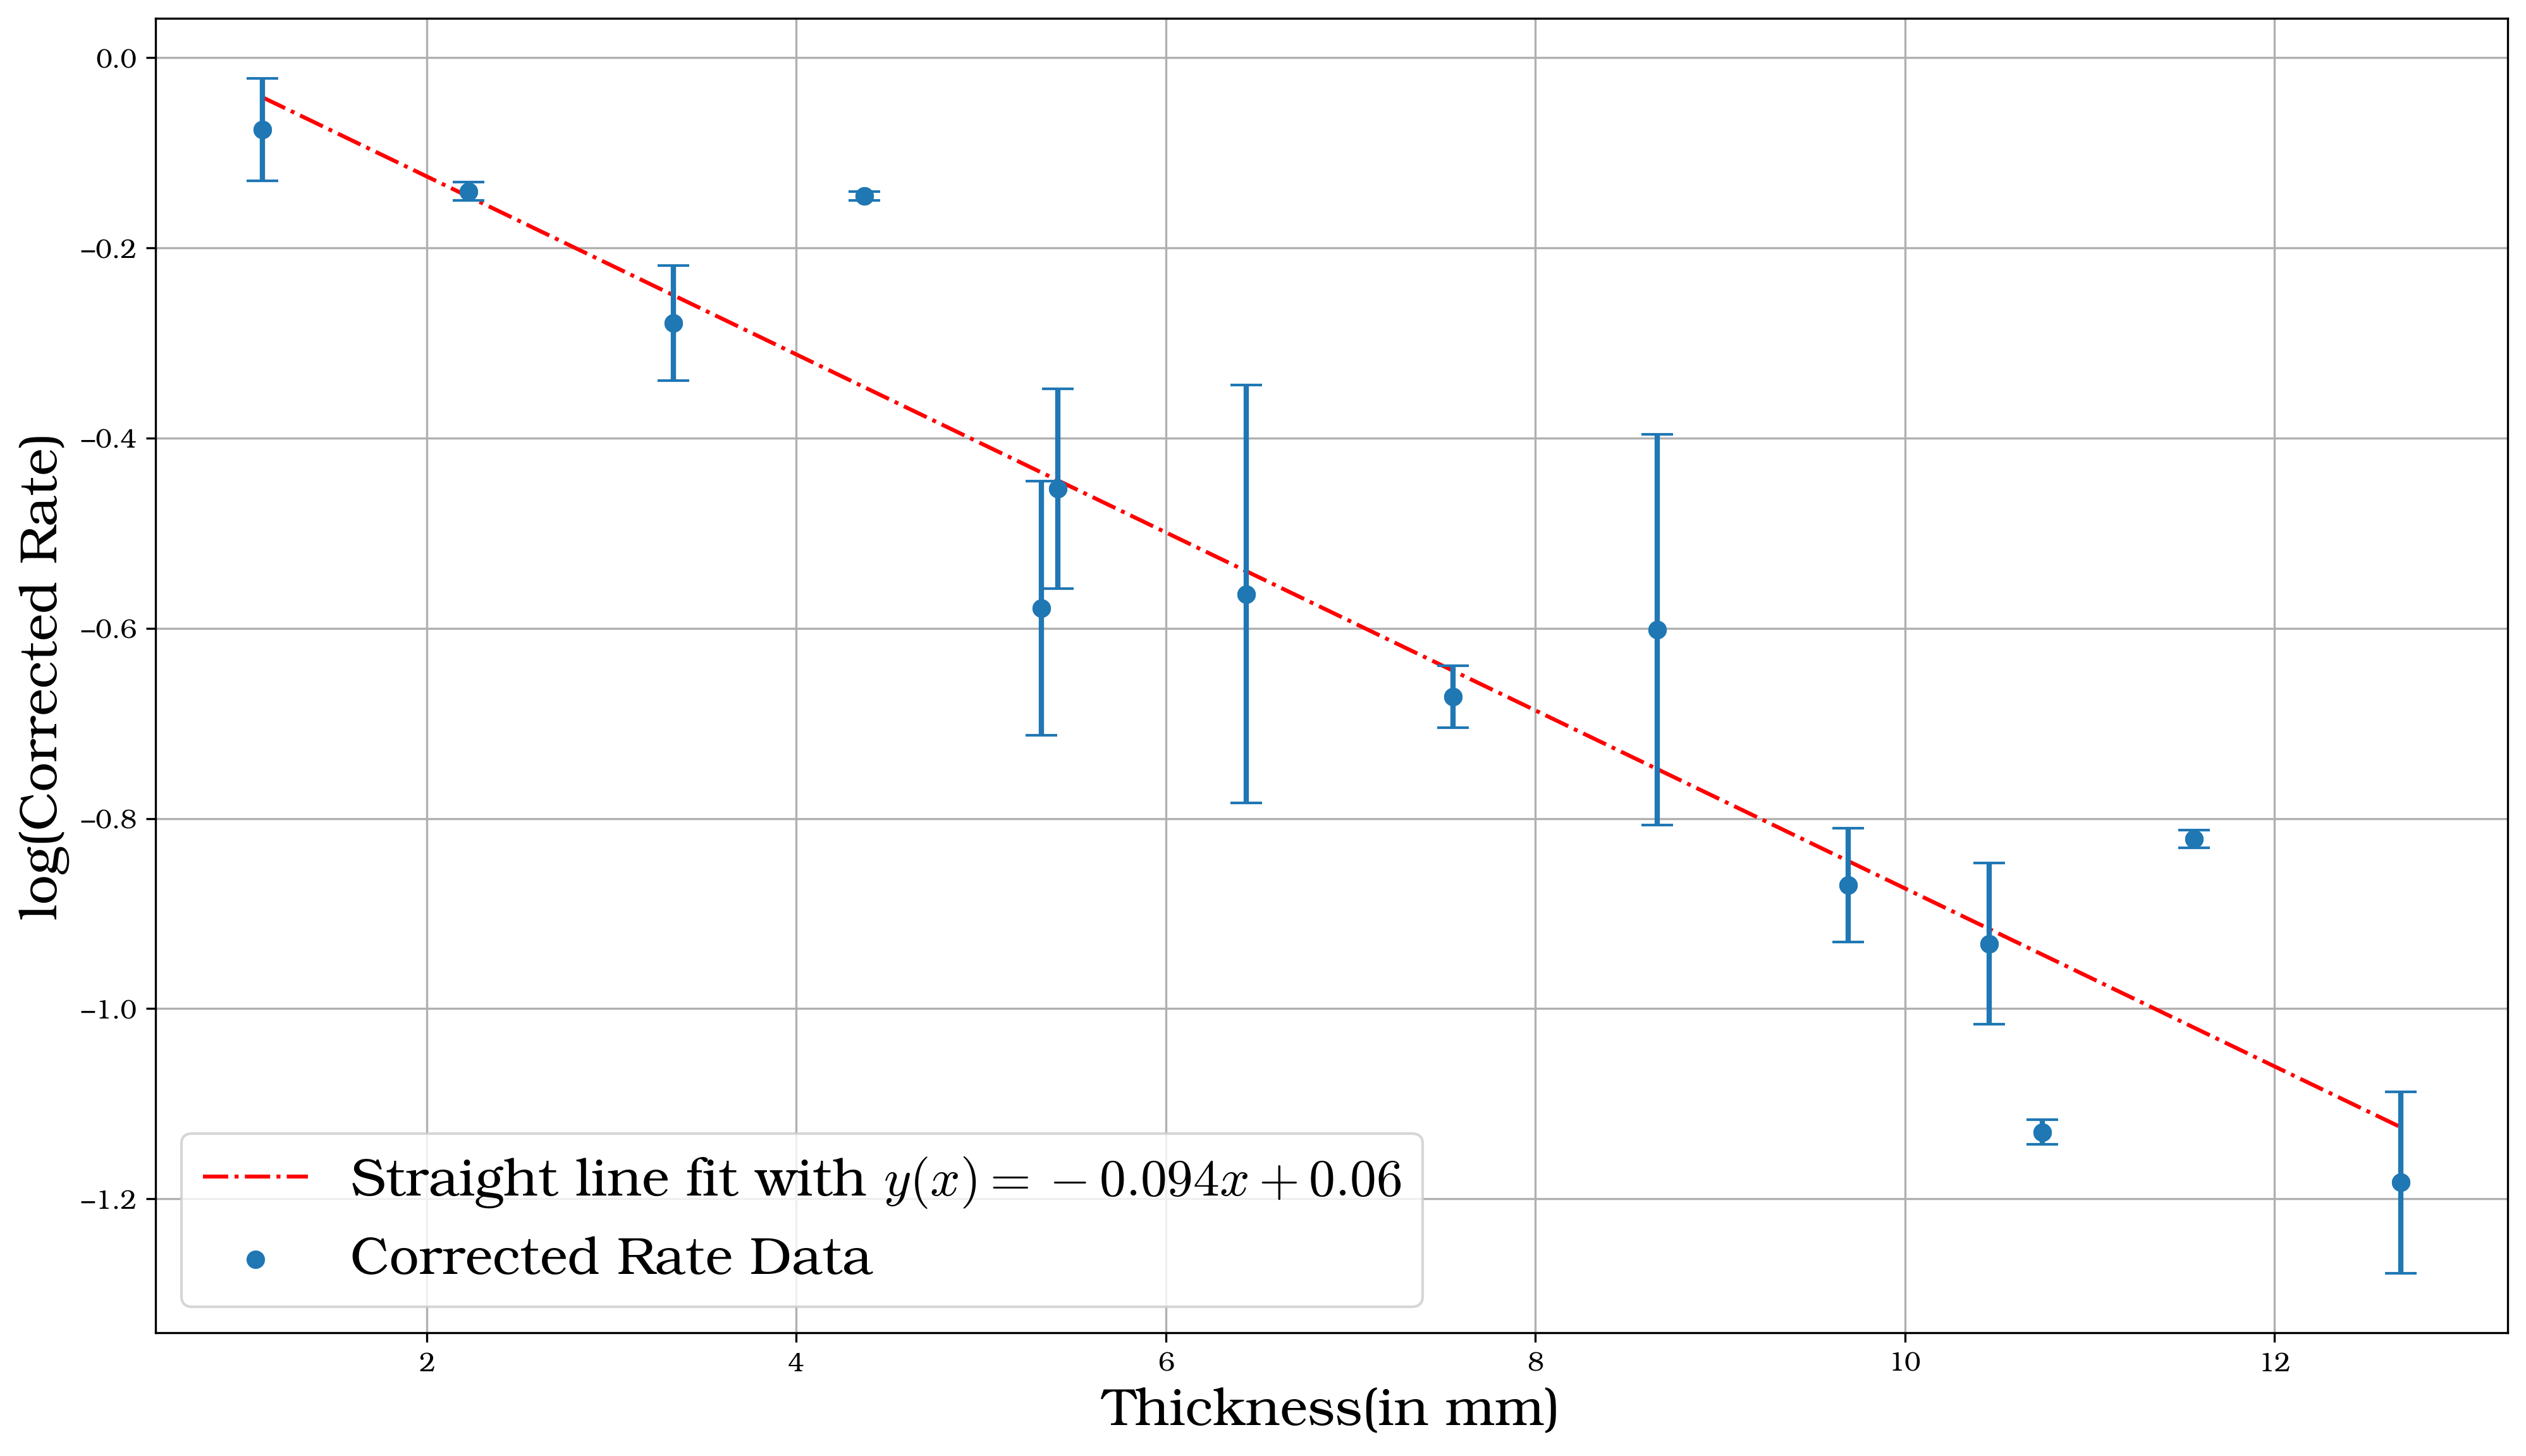

In [151]:
fig, axes = plt.subplots(1,1, figsize=(16,9),dpi=300)
axes.plot(x1,y1,'r-.',label=r"Straight line fit with $y(x) = -0.094x + 0.06$")
axes.scatter(thick, np.log(corrected_rate), label='Corrected Rate Data')
axes.errorbar(thick, np.log(corrected_rate),yerr = lnctstd,fmt='o',linewidth=2, capsize=6)

axes.legend(fontsize=20, loc='lower left')
axes.set_xlabel("Thickness(in mm)", fontsize=20)
axes.set_ylabel("log(Corrected Rate)", fontsize=20)
axes.grid()
fig.savefig("logcorr.png", dpi=600)

In [22]:
datainv = pd.read_excel("gmd.xlsx",sheet_name=1, header=5,usecols="O,P,R",nrows=55).dropna()
datainv

,Time,Distance,Avg Count
0,60.0,0.0,72.333333
3,60.0,-0.5,76.333333
6,60.0,-1.0,72.333333
9,60.0,-1.5,85.333333
12,60.0,-2.0,97.666667
15,60.0,-2.5,109.333333
18,60.0,-3.0,120.000000
21,60.0,-3.5,127.333333
24,60.0,-4.0,131.666667
27,60.0,-4.5,162.666667


In [154]:
datinverr = pd.read_excel("gmd.xlsx",sheet_name=1, header=5,usecols="Q",nrows=55).dropna()
datinverr

,Counts
0,71
1,76
2,70
3,70
4,71
5,88
6,68
7,68
8,81
9,86


In [163]:
temp = np.array(datinverr['Counts'])
temp = temp.astype(float)
inverr = np.zeros(int(len(temp)/3))
for i in range(0, len(temp),3):
    inverr[int(i/3)] = np.std([temp[i],temp[i+1],temp[i+2]])
inverr

array([ 2.62466929,  8.25967446,  6.12825877,  0.47140452,  9.87702159,
        9.42809042,  2.94392029,  8.01387685,  4.02768199, 12.49888884,
        3.29983165,  5.43650214,  4.54606057,  8.28653526, 17.15290711,
       14.70449667, 11.8977122 , 21.17125934])

In [167]:
xd = np.array(datainv['Distance '])
yc = np.array(datainv['Avg Count'])
xd = xd+12
lninverr = inverr/yc
xd,yc,lninverr

(array([12. , 11.5, 11. , 10.5, 10. ,  9.5,  9. ,  8.5,  8. ,  7.5,  7. ,
         6.5,  6. ,  5.5,  5. ,  4.5,  4. ,  3.5]),
 array([ 72.33333333,  76.33333333,  72.33333333,  85.33333333,
         97.66666667, 109.3333333 , 120.        , 127.3333333 ,
        131.6666667 , 162.6666667 , 176.6666667 , 190.6666667 ,
        224.        , 279.        , 333.6666667 , 375.3333333 ,
        462.6666667 , 561.6666667 ]),
 array([0.03628575, 0.10820534, 0.08472247, 0.00552427, 0.10112991,
        0.08623253, 0.02453267, 0.06293621, 0.03058999, 0.07683743,
        0.01867829, 0.02851312, 0.02029491, 0.02970084, 0.05140731,
        0.03917717, 0.02571552, 0.03769364]))

In [91]:
def logf(x, a, b, c):
    return a*np.log(x - b) + c


In [147]:
pa,pcov = curve_fit(f, np.log(xd), np.log(yc))
print(pa)
x2 = np.linspace(np.log(xd)[0],np.log(xd)[-1],1000)
y2 = f(x2, *pa)
pe = np.sqrt(np.diag(pcov))
pe

[-1.72157728  8.52277472]


array([0.03028289, 0.06112305])

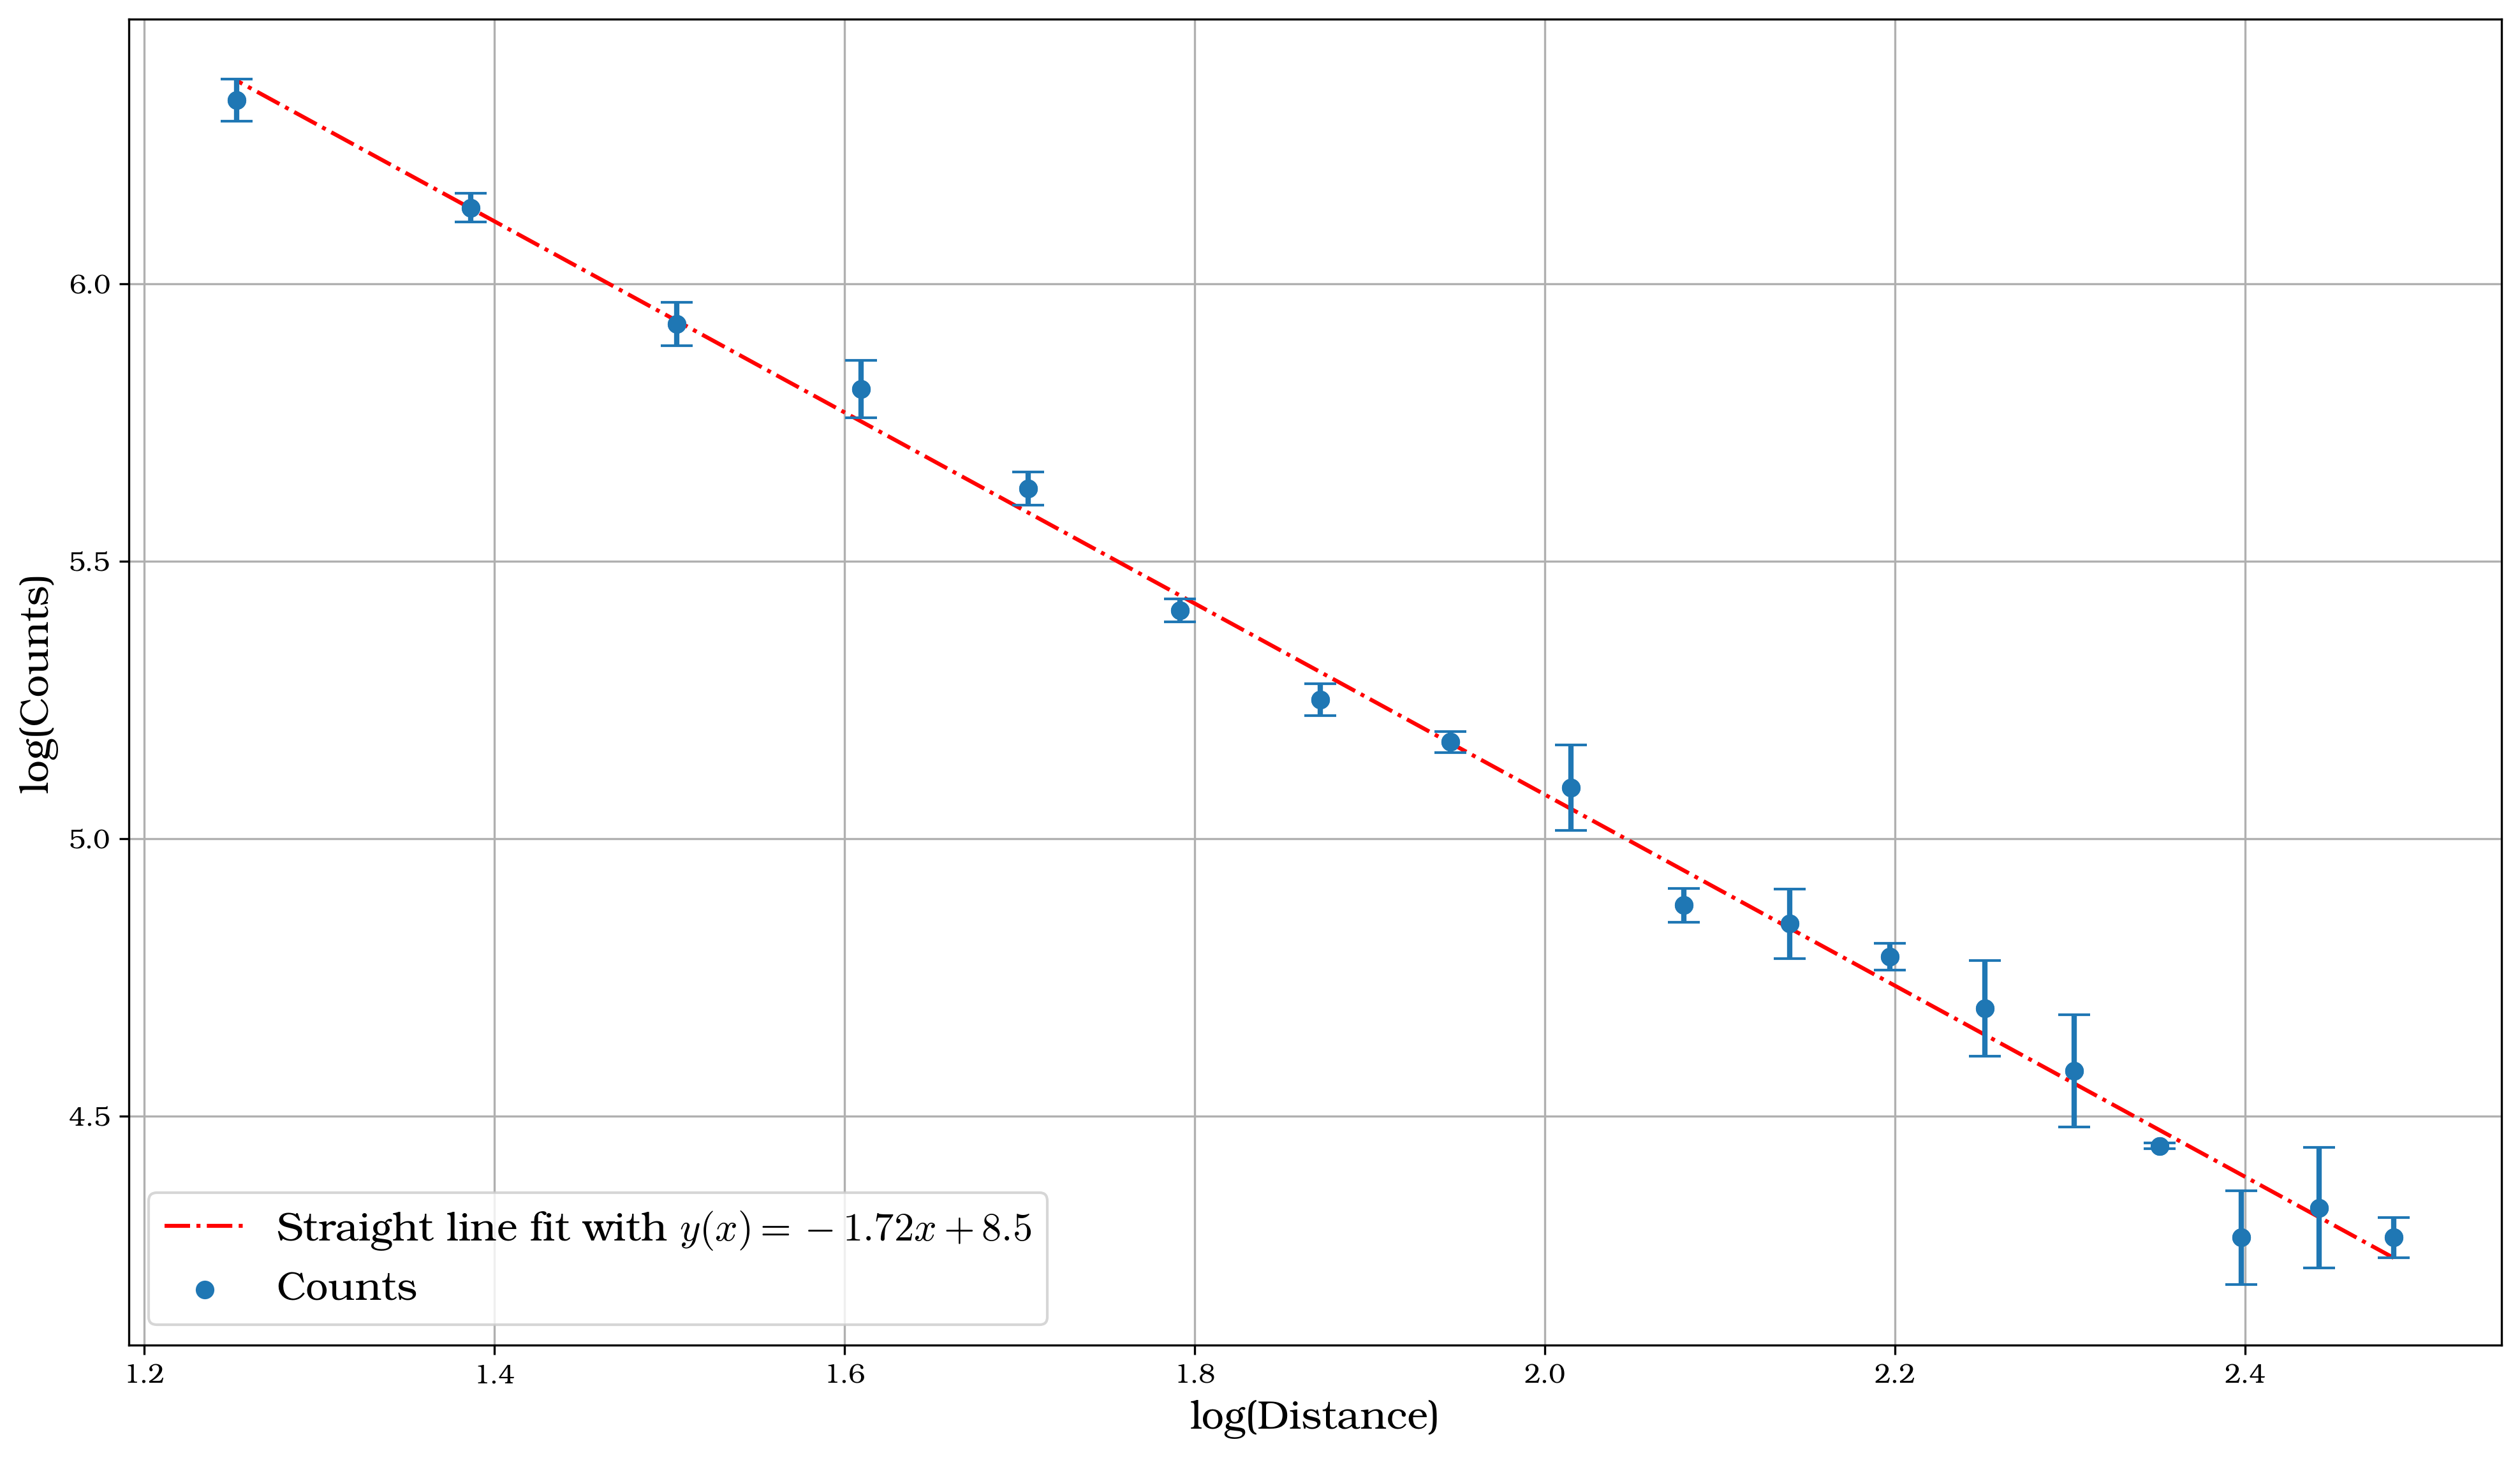

In [173]:
fig, axes = plt.subplots(1,1, figsize=(16,9),dpi=300)
axes.plot(x2,y2,'r-.',label=r"Straight line fit with $y(x) = -1.72x + 8.5$")
axes.scatter(np.log(xd),np.log(yc), label='Counts')
axes.errorbar(np.log(xd),np.log(yc), yerr=lninverr,fmt='o',linewidth=2, capsize=6)

axes.legend(fontsize=15,loc='lower left')
axes.set_xlabel("log(Distance)", fontsize=15)
axes.set_ylabel("log(Counts)", fontsize=15)
axes.grid()
fig.savefig("inversever.png", dpi=600)